# Potential Field Environment

In [2]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.ioff()

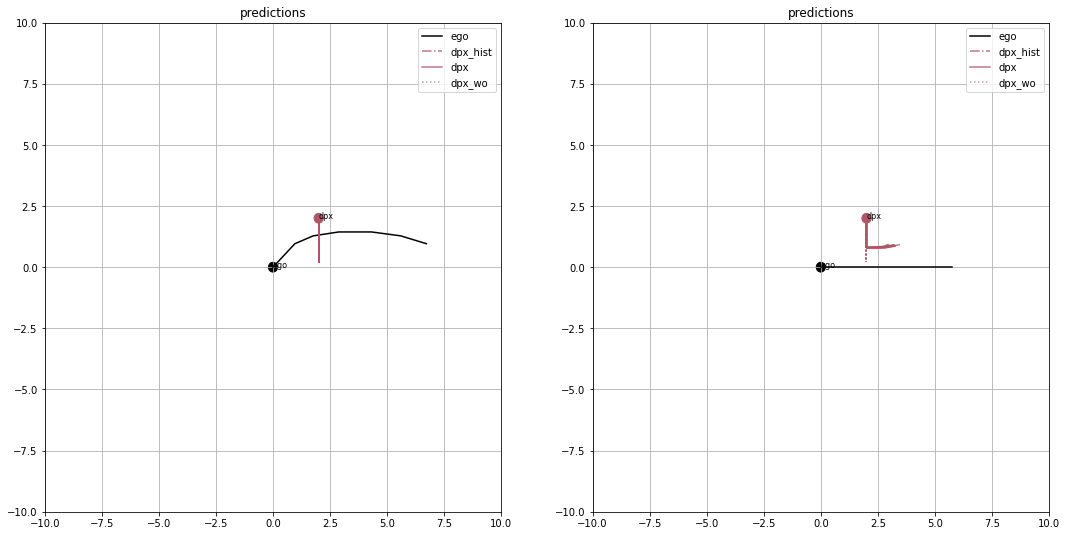

In [3]:
import mantrap
import torch

env = mantrap.environment.PotentialFieldEnvironment(torch.zeros(2), ego_velocity=torch.zeros(2))
env.add_ado(position=torch.tensor([2, 2]), velocity=torch.tensor([0, -0.5]))

fig, ax = plt.subplots(1, 2, figsize=(18, 9))

ego_controls = torch.cat((torch.ones((3, 2)), 
                          torch.tensor([2.0, -1.0] * 3).view(-1, 2), 
                          torch.tensor([-1.0, -1.0] * 3).view(-1, 2)))
env.visualize_prediction_w_controls(ego_controls, legend=True, num_samples=10, ax=ax[0])

ego_controls = torch.tensor([1.0, 0.0] * 9).view(-1, 2)
env.visualize_prediction_w_controls(ego_controls, legend=True, num_samples=10, ax=ax[1])

plt.show()

In [7]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.ioff()
from IPython.display import HTML

import mantrap
import torch


env = mantrap.environment.PotentialFieldEnvironment(torch.zeros(2), ego_velocity=torch.zeros(2))
env.add_ado(position=torch.tensor([2, 2]), velocity=torch.tensor([0.0, -0.5]))
env.add_ado(position=torch.tensor([-4, 2]), velocity=torch.tensor([1.0, 1.0]))
env.add_ado(position=torch.tensor([0, 5]), velocity=torch.tensor([1.0, -0.7]))
env.add_ado(position=torch.tensor([8, -5]), velocity=torch.tensor([-3.0, 0.1]))

solver = mantrap.solver.IPOPTSolver(env=env, goal=torch.tensor([8.0, 0.0]), is_logging=True, is_debug=False)
ego_trajectory, _ = solver.solve(time_steps=10)
HTML(solver.visualize_scenes())